In [146]:
import numpy as np
import pandas as pd
import requests
import math
from astropy.constants import sigma_sb, L_sun
from bs4 import BeautifulSoup as BS

import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import cm

In [2]:
planets = pd.read_csv('NASA_planets.csv')

In [3]:
uniq_plan = [x.lower() for x in planets.pl_name.unique()]

In [4]:
planets

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_masserr1,st_masserr2,st_masslim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,326.03000,0.32,-0.32,0.0,1.29000,0.05000,-0.05000,...,0.30,-0.30,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380
1,11 Com b,2,1,NaN,NaN,NaN,NaN,1.21000,0.06000,-0.05000,...,0.40,-0.30,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380
2,11 UMi b,1,1,NaN,NaN,NaN,NaN,1.51000,0.06000,-0.05000,...,0.40,-0.30,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650
3,11 UMi b,1,1,516.21997,3.20,-3.20,0.0,1.53000,0.07000,-0.07000,...,0.69,-0.69,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650
4,11 UMi b,1,1,516.22000,3.25,-3.25,0.0,1.54000,0.07000,-0.07000,...,0.25,-0.25,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29362,ups And d,2,3,1278.10000,2.90,-2.90,0.0,2.53000,0.15000,-0.15000,...,0.16,-0.14,0.0,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,0.06350,-0.06290
29363,ups And d,2,3,1276.46000,0.57,-0.57,0.0,2.51329,0.00075,-0.00075,...,NaN,NaN,0.0,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,0.06350,-0.06290
29364,ups And d,2,3,1319.00000,18.00,-18.00,0.0,2.57000,NaN,NaN,...,NaN,NaN,NaN,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,0.06350,-0.06290
29365,xi Aql b,1,1,NaN,NaN,NaN,NaN,0.58000,0.02000,-0.03000,...,0.20,-0.20,0.0,19h54m14.99s,298.562449,+08d27m39.98s,8.461105,56.1858,0.55975,-0.55975


In [5]:
planets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_mass',
       'st_masserr1', 'st_masserr2', 'st_masslim', 'rastr', 'ra', 'decstr',
       'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2'],
      dtype='object')

In [6]:
planets.st_spectype.unique()

array(['G8 III', nan, 'K4 III', 'K0 III', 'K0 V', 'G2.5 V', 'G3 V',
       'G6 III', 'K7 V', 'G3 IV', 'M5.5/M6', 'M3.5 V', 'M6', 'M8.5', 'M8',
       'F6 V', 'K1 III', 'K1.5 III', 'G1 V', 'G0 V', 'F0 IV', 'G8 V',
       'K0 IV-V', 'K0 IV', 'G5 V', 'G3 III', 'K0', 'G5 III', 'K2 V',
       'K2 II', 'K5 III', 'G', 'K7/M0 V', 'K3 V', 'K5 V', 'M3.5', 'K7',
       'K1 V', 'F9 V', 'G2 V', 'G9 V', 'F8 IV', 'F9', 'G5', 'G2',
       'G8/9 IV', 'F3 V', 'G2 IV', 'G0 VI', 'L1.5', 'M0.5', 'F8 V',
       'F5 V', 'G6 V', 'G0', 'K3', 'G8 IV/V', 'M7.25', 'M2.5 V', 'M5.5 V',
       'M4.5 V', 'M3', 'K4.5', 'M2 V', 'M1', 'M0 V', 'M1/M2 V', 'M3.0 V',
       'M0.5 V', 'M0', 'M2.5', 'M4', 'M0.0 V', 'M1.5', 'M4.0 V', 'M1.9',
       'M1.5 V', 'M4.0', 'M3.5 Ve', 'M1 V', 'M3 V', 'M2', 'M4 V', 'K6 V',
       'M1.0 V', 'K4', 'G4', 'F', 'F8', 'K', 'K2', 'K1', 'G3', 'G8',
       'A8 V', 'G V', 'K V', 'F V', 'B9 Vne', 'G9 III', 'K2 IV', 'G5 IV',
       'K2 III', 'K9 V', 'G4 IV', 'G7 III', 'G7 V', 'K4 V', 'G4 V',
     

In [7]:
final_planets = planets.groupby('pl_name').mean().reset_index()


In [8]:
pl_name = final_planets.pl_name.unique()

In [9]:
for name in pl_name:
    try:
        final_planets.loc[final_planets.pl_name == name, 'spec_type'] = planets.loc[planets.pl_name == name, 'st_spectype'].dropna().values[0]
    except:
        final_planets.loc[final_planets.pl_name == name, 'spec_type'] = np.nan
    

In [10]:
final_planets.loc[final_planets.pl_orbsmax.isna()]

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,spec_type
16,2MASS J21402931+1625183 A b,1,1,7336.500000,1934.500000,-584.000000,0.0,NaN,NaN,NaN,...,0.080,0.060,-0.060,0.0,325.121821,16.421341,NaN,NaN,NaN,M8.5
66,CI Tau b,1,1,8.989100,0.020200,-0.020200,0.0,NaN,NaN,NaN,...,0.900,0.020,-0.020,0.0,68.466769,22.841619,157.9980,1.1980,-1.1800,K7
112,DS Tuc A b,2,1,8.138396,0.000197,-0.000197,0.0,NaN,NaN,NaN,...,0.985,0.045,-0.045,0.0,354.915467,-69.196043,44.0622,0.0693,-0.0691,G6 V
114,EPIC 201238110 b,1,1,28.167600,0.003250,-0.003550,0.0,NaN,NaN,NaN,...,0.410,0.110,-0.050,0.0,179.705853,-3.389461,159.2590,1.4140,-1.3900,NaN
115,EPIC 201497682 b,1,1,2.131740,0.000220,-0.000220,0.0,NaN,NaN,NaN,...,0.780,0.090,-0.170,0.0,168.936679,0.488061,253.0260,1.6640,-1.6640,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,NY Vir c,2,2,8799.000000,240.000000,-240.000000,0.0,NaN,NaN,NaN,...,0.460,0.010,-0.010,0.0,204.700585,-2.030387,544.0240,18.8765,-18.8765,NaN
4023,SR 12 AB c,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.831236,-24.694669,NaN,NaN,NaN,NaN
4088,TOI-837 b,1,1,8.324876,0.000016,-0.000016,0.0,NaN,NaN,NaN,...,1.120,0.060,-0.060,0.0,157.037281,-64.505211,142.4880,0.4610,-0.4580,G0/F9 V
4139,WASP-107 c,1,2,1088.000000,15.000000,-16.000000,0.0,NaN,NaN,NaN,...,0.680,0.020,-0.020,0.0,188.386428,-10.146214,64.7414,0.2617,-0.2596,NaN


In [11]:
final_planets.spec_type.isna().sum()

3140

In [12]:
final_planets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'ra', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'spec_type'],
      dtype='object')

In [13]:
planets.loc[planets.pl_name == 'xi Aql b', 'st_spectype']

29365    NaN
29366    NaN
Name: st_spectype, dtype: object

In [14]:
final_planets.st_teff.isna().sum()

216

In [15]:
nan_stellar_t = final_planets[final_planets.st_teff.isna()]

In [16]:
nan_stellar_t

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,spec_type
10,2MASS J01033563-5515561 AB b,2,1,NaN,NaN,NaN,NaN,84.000,NaN,NaN,...,0.19,0.02,-0.02,0.0,15.899249,-55.265829,NaN,NaN,NaN,M5.5/M6
13,2MASS J04414489+2301513 b,1,1,NaN,NaN,NaN,NaN,15.000,NaN,NaN,...,0.02,NaN,NaN,0.0,70.437108,23.030854,NaN,NaN,NaN,M8.5
15,2MASS J19383260+4603591 b,2,1,416.00,2.00,-2.00,0.0,0.920,0.020,-0.020,...,0.48,0.03,-0.03,0.0,294.635917,46.066408,396.33200,6.38850,-6.38850,NaN
42,AB Pic b,1,1,NaN,NaN,NaN,NaN,260.000,NaN,NaN,...,NaN,NaN,NaN,NaN,94.803921,-58.054118,50.04750,0.07350,-0.07330,K2 V
65,CHXR 73 b,1,1,NaN,NaN,NaN,NaN,210.000,NaN,NaN,...,0.35,NaN,NaN,0.0,166.619399,-77.625872,190.37400,6.64700,-6.22000,M3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,eps Ind A b,3,1,16510.00,2100.00,-1740.00,0.0,11.550,0.980,-0.860,...,0.75,0.04,-0.04,0.0,330.871402,-56.796902,3.63857,0.00333,-0.00333,K2 V
4355,tau Cet e,1,4,162.87,1.08,-0.46,0.0,0.538,0.060,-0.060,...,0.78,0.01,-0.01,0.0,26.009303,-15.933799,3.60304,0.00678,-0.00675,NaN
4356,tau Cet f,1,4,636.13,11.70,-47.69,0.0,1.334,0.017,-0.044,...,0.78,0.01,-0.01,0.0,26.009303,-15.933799,3.60304,0.00678,-0.00675,NaN
4357,tau Cet g,1,4,20.00,0.02,-0.01,0.0,0.133,0.001,-0.002,...,0.78,0.01,-0.01,0.0,26.009303,-15.933799,3.60304,0.00678,-0.00675,NaN


In [17]:
spectral_type =  {'M5.5/M6': 2950,
        'M8.5': 2700,
         np.nan: np.nan,
        'K2 V': 4960,
        'M3.5': 3500,
        'K7': 4000,
        'L1.5': 2400,
        'M2.5': 3600,
        'M3.5 Ve': 3500,
        'M0 V': 3750,
        'M4.5 V': 3400,
        'M3': 3500,
        'G6 V': 5570,
        'K0': 5240,
        'G0': 6050,
        'G1 V': 5930,
        'G8 V': 5440,
        'G8': 5440,
        'G4 V': 5690,
        'G4 IV-V': 5700,
        'M2 V': 3600,
        'M0': 3750,
        'M0.5 Ve': 3800,
        'F5 V': 6700,
        'F7 V': 6400,
        'M': 3225,
        'K': 4620,
        'M2-M7': 3250,
        'K5': 4400,
        'G5 V': 5660,
        'M V': 3225}

In [18]:


final_planets.loc[(final_planets.st_teff.isna()) , 'st_teff'] = \
final_planets.loc[final_planets.st_teff.isna(), 'spec_type'].apply(lambda x: spectral_type[x])

In [19]:
final_planets

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,spec_type
0,11 Com b,2,1,326.030000,0.320000,-0.320000,0.0,1.250000,0.055000,-0.050000,...,2.650000,0.350000,-0.300000,0.0,185.178779,17.793252,93.1846,1.92380,-1.92380,G8 III
1,11 UMi b,1,1,516.219985,3.225000,-3.225000,0.0,1.526667,0.066667,-0.063333,...,2.093333,0.446667,-0.413333,0.0,229.274595,71.823943,125.3210,1.97650,-1.97650,K4 III
2,14 And b,1,1,185.840000,0.230000,-0.230000,0.0,0.755000,0.030000,-0.060000,...,1.700000,0.250000,-0.250000,0.0,352.824150,39.235837,75.4392,0.71400,-0.71400,K0 III
3,14 Her b,1,1,1766.640004,15.825000,-15.825000,0.0,2.819000,0.065000,-0.065000,...,0.922000,0.090000,-0.065000,0.0,242.602101,43.816362,17.9323,0.00730,-0.00730,K0 V
4,16 Cyg B b,3,1,799.360000,2.980000,-2.980000,0.0,1.660200,0.046750,-0.046750,...,1.025000,0.080000,-0.070000,0.0,295.465642,50.516824,21.1397,0.01100,-0.01110,G2.5 V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,tau Gem b,1,1,305.250000,0.100000,-0.100000,0.0,1.170000,NaN,NaN,...,2.300000,0.300000,-0.300000,0.0,107.784723,30.244954,112.5370,4.25300,-3.95900,K2 III
4360,ups And b,2,3,4.615874,0.001044,-0.001044,0.0,0.058744,0.001467,-0.001467,...,1.216667,0.160000,-0.140000,0.0,24.198353,41.403815,13.4054,0.06350,-0.06290,F8 V
4361,ups And c,2,3,240.552000,0.233500,-0.233500,0.0,0.827693,0.019338,-0.019338,...,1.225000,0.160000,-0.140000,0.0,24.198353,41.403815,13.4054,0.06350,-0.06290,F8 V
4362,ups And d,2,3,1287.040000,6.617500,-6.617500,0.0,2.530822,0.063583,-0.063583,...,1.225000,0.160000,-0.140000,0.0,24.198353,41.403815,13.4054,0.06350,-0.06290,F8 V


In [20]:
final_planets['pl_orbper_yrs'] = final_planets['pl_orbper'] / 365.25

In [21]:
final_planets.loc[final_planets.pl_orbper.isna()]

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_masserr1,st_masserr2,st_masslim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,spec_type,pl_orbper_yrs
6,1RXS J160929.1-210524 b,1,1,NaN,NaN,NaN,NaN,330.0,NaN,NaN,...,0.165,-0.1025,0.000000,242.376234,-21.083140,139.1350,1.3320,-1.3070,K7 V,NaN
10,2MASS J01033563-5515561 AB b,2,1,NaN,NaN,NaN,NaN,84.0,NaN,NaN,...,0.020,-0.0200,0.000000,15.899249,-55.265829,NaN,NaN,NaN,M5.5/M6,NaN
11,2MASS J01225093-2439505 b,1,1,NaN,NaN,NaN,NaN,52.0,6.0,-6.0,...,0.035,-0.0350,0.000000,20.712801,-24.664613,33.8281,0.0864,-0.0860,M3.5 V,NaN
12,2MASS J02192210-3925225 b,1,1,NaN,NaN,NaN,NaN,156.0,10.0,-10.0,...,0.010,-0.0100,0.000000,34.842705,-39.423077,NaN,NaN,NaN,M6,NaN
13,2MASS J04414489+2301513 b,1,1,NaN,NaN,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,0.000000,70.437108,23.030854,NaN,NaN,NaN,M8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,USco1621 b,1,1,NaN,NaN,NaN,NaN,2880.0,20.0,-20.0,...,0.080,-0.0800,0.000000,245.373086,-25.495427,137.9010,0.9730,-0.9600,M2.5 V,NaN
4129,VHS J125601.92-125723.9 b,2,1,NaN,NaN,NaN,NaN,102.0,9.0,-9.0,...,0.020,-0.0100,-0.666667,194.008964,-12.956031,NaN,NaN,NaN,M7.5,NaN
4304,WD 0806-661 b,1,1,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,...,NaN,NaN,NaN,121.727568,-66.305883,19.2444,0.0073,-0.0073,NaN,NaN
4306,WISEP J121756.91+162640.2 A b,1,1,NaN,NaN,NaN,NaN,8.0,1.3,-1.3,...,0.010,-0.0100,0.000000,184.487125,16.444500,NaN,NaN,NaN,T8.5,NaN


In [22]:
final_planets.dropna(subset = ['pl_orbper'], inplace = True)

In [23]:
final_planets.loc[final_planets.pl_orbsmax.isna(), 'pl_orbsmax'] = \
final_planets.loc[final_planets.pl_orbsmax.isna(), 'pl_orbper_yrs'].apply(lambda x: (x**2)**(1./ 3.))

In [24]:
final_planets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'ra', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'spec_type', 'pl_orbper_yrs'],
      dtype='object')

In [25]:
final_planets.drop(columns = ['pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2','pl_orbsmaxlim', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassjerr1', 'pl_bmassjerr2','pl_bmassjlim', 'st_tefferr1','st_tefferr2','st_tefflim','st_masserr1','st_masserr2','st_masslim','sy_disterr1','sy_disterr2'], inplace = True)



In [26]:
final_planets.loc[final_planets.st_teff.isna(), 'pl_name']

15      2MASS J19383260+4603591 b
80                     CoRoT-20 c
102                      DE CVn b
111                      DP Leo b
114              EPIC 201238110 b
                  ...            
4334                    eps Eri b
4355                    tau Cet e
4356                    tau Cet f
4357                    tau Cet g
4358                    tau Cet h
Name: pl_name, Length: 76, dtype: object

In [27]:
final_planets.loc[final_planets.spec_type.isna()]

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass,ra,dec,sy_dist,spec_type,pl_orbper_yrs
8,24 Sex b,1,2,452.800000,1.333000,632.460000,1.99000,5098.0,1.540,155.868487,-0.902400,72.06910,NaN,1.239699
9,24 Sex c,1,2,883.000000,2.080000,273.320000,0.86000,5098.0,1.540,155.868487,-0.902400,72.06910,NaN,2.417522
15,2MASS J19383260+4603591 b,2,1,416.000000,0.920000,603.877000,1.90000,NaN,0.480,294.635917,46.066408,396.33200,NaN,1.138946
23,47 UMa d,1,3,14002.000000,11.600000,521.220000,1.64000,5872.0,1.060,164.864761,40.430493,13.79670,NaN,38.335387
25,51 Peg b,1,1,4.230464,0.052233,148.582225,0.46750,5765.5,1.035,344.367540,20.769096,15.46140,NaN,0.011582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,tau Cet e,1,4,162.870000,0.538000,3.930000,0.01237,NaN,0.780,26.009303,-15.933799,3.60304,NaN,0.445914
4356,tau Cet f,1,4,636.130000,1.334000,3.930000,0.01237,NaN,0.780,26.009303,-15.933799,3.60304,NaN,1.741629
4357,tau Cet g,1,4,20.000000,0.133000,1.750000,0.00551,NaN,0.780,26.009303,-15.933799,3.60304,NaN,0.054757
4358,tau Cet h,1,4,49.410000,0.243000,1.830000,0.00576,NaN,0.780,26.009303,-15.933799,3.60304,NaN,0.135277


In [28]:
final_planets.loc[final_planets.st_teff.isna(), 'pl_name'].values[0:76]

array(['2MASS J19383260+4603591 b', 'CoRoT-20 c', 'DE CVn b', 'DP Leo b',
       'EPIC 201238110 b', 'EPIC 201497682 b', 'EPIC 201615463 c',
       'EPIC 201754305 d', 'EPIC 201833600 c', 'EPIC 206024342 b',
       'EPIC 206032309 b', 'EPIC 206042996 b', 'EPIC 206215704 b',
       'EPIC 206317286 b', 'EPIC 212297394 b', 'EPIC 212424622 b',
       'EPIC 212499991 b', 'EPIC 212587672 b', 'EPIC 220554210 c',
       'GJ 163 b', 'GJ 163 c', 'GJ 163 d', 'GJ 180 d', 'GJ 2056 b',
       'GJ 229 A c', 'GJ 3082 b', 'GJ 433 d', 'GJ 676 A c', 'GJ 687 c',
       'HD 102329 c', 'HD 114783 c', 'HD 116029 c', 'HD 156279 c',
       'HD 177565 b', 'HD 33142 c', 'HD 41004 A b', 'HD 47186 c',
       'HD 73526 c', 'HD 99706 c', 'HIP 4845 b', 'HU Aqr AB b',
       'HU Aqr AB c', 'HW Vir b', 'IC 4651 9122 b', 'K2-32 e',
       'Kepler-448 c', 'Kepler-47 d', 'Kepler-65 e', 'Kepler-82 f',
       'MOA-2009-BLG-266L b', 'MOA-2009-BLG-387L b',
       'MOA-2011-BLG-293L b', 'MXB 1658-298 b', 'OGLE-2005-BLG-390L b'

In [29]:
url = 'http://www.exoplanetkyoto.org/exohtml/A_All_HostStars.html'
resp = requests.get(url)
bs = BS(resp.content, 'html.parser')
x = bs.table.findAll('td')
lst = []
for i in range(0,len(x),10):
    lst.append([f.text.strip() for f in x[i:i+10]])
    df = pd.DataFrame(lst,columns=lst[0])

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [30]:
df.drop(0, inplace = True)
df.set_index('No', inplace = True)


In [31]:
df

,Host Star's Name,Altenate Name,Radius (Rsun),Mass (Msun),Distance (LY),Spectral Type,Est.Temperature(K),Apparent Magnitude,Imaginary picture
No,,,,,,,,,
1,AB_Dor_C,,0.0720,0.0720,51.53,M8,2700,22.0,
2,AB_Pic,,0.7565,0.0000,163.73,K2 V,4875,9.2,
3,AD_Leo,GJ 388,0.4284,0.0000,16.20,M4V,3400,9.5,
4,AD_3116,"""2MASS J08423943+1924520, EPIC 211946007""",0.2900,0.2760,608.41,M3.9,3200,14.3,
5,AS_205A,V866 Sco,3.7000,0.9000,456.62,K5,4300,12.4,
...,...,...,...,...,...,...,...,...,...
3528,55_Cnc,,0.9430,0.9050,40.25,K0IV-V,5196,6.0,
3529,61_Vir,HD 115617,0.9400,0.9500,27.90,G5V,5531,4.7,
3530,70_Vir,HR 117176,1.9680,0.9200,58.66,G4 V,5432,5.0,


In [32]:
eff_surf_temp = {'2MASS J19383260+4603591 b': 33500.00,
                 'CoRoT-20 c': 5880.00,
                 'DE CVn b': 5745.00,
                 'DP Leo b': 3500.00,
                 'EPIC 201238110 b': 3587.00,
                 'EPIC 201497682 b': 4670.3500,
                 'EPIC 201615463 c': 3300.00,
                 'EPIC 201754305 d': 4761.00,
                 'EPIC 201833600 c': 3300.00,
                 'EPIC 206024342 b': 5800.00,
                 'EPIC 206032309 b': 3225.00,
                 'EPIC 206042996 b': 4800.00,
                 'EPIC 206215704 b': 3225.00,
                 'EPIC 206317286 b': 4800.00, 
                 'EPIC 212297394 b': 3700.00,
                 'EPIC 212424622 b': 5776.00,
                 'EPIC 212499991 b': 4730.00,
                 'EPIC 212587672 b': 5776.00,
                 'EPIC 220554210 c': 5776.00,
                 'GJ 163 b': 3300.00,
                 'GJ 163 c': 3300.00,
                  'GJ 163 d': 3300.00,
                  'GJ 180 d': 3371.00,
                 'GJ 2056 b': 4730.00,
                'GJ 229 A c': 3564.00,
                 'GJ 3082 b': 3500.00,
                  'GJ 433 d': 3600.00,
                'GJ 676 A c': 3750.00,
                  'GJ 687 c': 3350.00,
               'HD 102329 c': 4830.00,
               'HD 114783 c': 5105.00,
               'HD 116029 c': 4951.00,
               'HD 156279 c': 5453.00,
               'HD 177565 b': 5440.00,
                'HD 33142 c': 4978.00,
              'HD 41004 A b': 5035.00,
                'HD 47186 c': 5675.00,
                'HD 73526 c': 5590.00,
                'HD 99706 c': 4932.00,
                'HIP 4845 b': 3750.00,
              'HU Aqr AB b': 5500.00,
              'HU Aqr AB c': 5500.00,
                 'HW Vir b': 5500.00,
           'IC 4651 9122 b': 3300.00,
                  'K2-32 e': 5315.00,
             'Kepler-448 c': 6820.00,
              'Kepler-47 d': 5636.00,
              'Kepler-65 e': 6211.00,
              'Kepler-82 f': 5428.00,
      'MOA-2009-BLG-266L b': 3300.00,
      'MOA-2009-BLG-387L b': 3300.00,
      'MOA-2011-BLG-293L b': 3300.00,
           'MXB 1658-298 b': 3300.00,
     'OGLE-2005-BLG-390L b': 3300.00,
     'OGLE-2006-BLG-109L b': 3300.00,
     'OGLE-2006-BLG-109L c': 3300.00,
    'OGLE-2016-BLG-1190L b': 3300.00,
           'PSR B0329+54 b': 3300.00,
           'PSR B1257+12 b': 3300.00,
           'PSR B1257+12 c': 3300.00,
           'PSR B1257+12 d': 3300.00,
         'PSR J2322-2650 b': 3300.00,
              'SWEEPS-11 b': 3300.00,
               'SWEEPS-4 b': 3300.00,
                 'UZ For b': 5500.00,
                 'UZ For c': 5500.00,
              'V1298 Tau c': 4970.00,
              'V1298 Tau d': 4970.00,
              'V1298 Tau e': 4970.00,
                 'WASP-8 c': 5600.00,
                'bet Pic c': 8100.00,
                'eps Eri b': 5084.00,
                'tau Cet e': 5344.00,
                'tau Cet f': 5344.00,
                'tau Cet g': 5344.00,
                'tau Cet h': 5344.00}
                 

In [33]:
final_planets.loc[(final_planets.st_teff.isna()) , 'st_teff'] = \
final_planets.loc[final_planets.st_teff.isna(), 'pl_name'].apply(lambda x: eff_surf_temp[x])

In [34]:
final_planets.loc[final_planets.st_teff.isna(), 'pl_name']

Series([], Name: pl_name, dtype: object)

In [35]:
final_planets

,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass,ra,dec,sy_dist,spec_type,pl_orbper_yrs
0,11 Com b,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,2.650000,185.178779,17.793252,93.1846,G8 III,0.892621
1,11 UMi b,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,2.093333,229.274595,71.823943,125.3210,K4 III,1.413333
2,14 And b,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,1.700000,352.824150,39.235837,75.4392,K0 III,0.508802
3,14 Her b,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,0.922000,242.602101,43.816362,17.9323,K0 V,4.836797
4,16 Cyg B b,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,1.025000,295.465642,50.516824,21.1397,G2.5 V,2.188528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,tau Gem b,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,2.300000,107.784723,30.244954,112.5370,K2 III,0.835729
4360,ups And b,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,1.216667,24.198353,41.403815,13.4054,F8 V,0.012638
4361,ups And c,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,1.225000,24.198353,41.403815,13.4054,F8 V,0.658595
4362,ups And d,2,3,1287.040000,2.530822,1284.154475,4.040500,6105.510,1.225000,24.198353,41.403815,13.4054,F8 V,3.523723


In [36]:
radi_df = pd.read_csv('stellar_radi.csv')

In [37]:
radi_df.columns

Index(['pl_name', 'hostname', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim'],
      dtype='object')

In [38]:
radi_df.drop(columns = ['st_raderr1', 'st_raderr2',
       'st_radlim','st_masserr1', 'st_masserr2', 'st_masslim'], inplace = True)

In [39]:
radi_df = radi_df.groupby('pl_name').mean().reset_index()

In [40]:
radi_df.__len__()

4364

In [41]:
final_planets.__len__()

4224

In [42]:
radi_df.loc[radi_df.st_rad.isna()]

,pl_name,st_rad,st_mass
10,2MASS J01033563-5515561 AB b,NaN,0.19
13,2MASS J04414489+2301513 b,NaN,0.02
15,2MASS J19383260+4603591 b,NaN,0.48
17,2MASS J22362452+4751425 b,NaN,0.60
42,AB Pic b,NaN,NaN
...,...,...,...
4351,psi 1 Dra B b,NaN,1.19
4355,tau Cet e,NaN,0.78
4356,tau Cet f,NaN,0.78
4357,tau Cet g,NaN,0.78


In [43]:
HZ = pd.merge(radi_df, final_planets, on ='pl_name')

In [44]:
HZ.columns

Index(['pl_name', 'st_rad', 'st_mass_x', 'sy_snum', 'sy_pnum', 'pl_orbper',
       'pl_orbsmax', 'pl_bmasse', 'pl_bmassj', 'st_teff', 'st_mass_y', 'ra',
       'dec', 'sy_dist', 'spec_type', 'pl_orbper_yrs'],
      dtype='object')

In [45]:
new_col = ['pl_name', 'pl_orbper_yrs', 'st_mass_x', 'sy_snum', 'sy_pnum', 'pl_orbper',
       'pl_orbsmax', 'pl_bmasse', 'pl_bmassj', 'st_teff', 'st_mass_y', 'st_rad', 'ra',
       'dec', 'sy_dist', 'spec_type']

In [46]:
HZ.spec_type.unique()

array(['G8 III', 'K4 III', 'K0 III', 'K0 V', 'G2.5 V', 'G6 III', 'G3 IV',
       nan, 'M8.5', 'F6 V', 'K1 III', 'K1.5 III', 'G1 V', 'F0 IV', 'G8 V',
       'K0 IV', 'G5 V', 'G3 III', 'K0', 'G5 III', 'K2 V', 'K2 II',
       'K5 III', 'G', 'K7/M0 V', 'K3 V', 'K7 V', 'K5 V', 'K7', 'G0 V',
       'K1 V', 'F9 V', 'G2 V', 'G9 V', 'F8 IV', 'G3 V', 'F9', 'G5', 'G2',
       'G8/9 IV', 'F3 V', 'G2 IV', 'G0 VI', 'L1.5', 'F8 V', 'F5 V',
       'G6 V', 'G0', 'K3', 'G8 IV/V', 'M2.5 V', 'M5.5 V', 'M4.5 V', 'M3',
       'K4.5', 'M2 V', 'M1', 'M0 V', 'M3.5 V', 'M1/M2 V', 'M3.0 V',
       'M0.5 V', 'M3.5', 'M0', 'M2.5', 'M4', 'M0.0 V', 'M1.5', 'M4.0 V',
       'M1.9', 'M4.0', 'M1.5 V', 'M3.5 Ve', 'M1 V', 'M3 V', 'M2', 'M0.5',
       'M4 V', 'K6 V', 'K4', 'G4', 'F8', 'K', 'K2', 'K1', 'G3', 'G8', 'F',
       'A8 V', 'G V', 'K V', 'F V', 'G9 III', 'K2 IV', 'G5 IV', 'K2 III',
       'K9 V', 'G4 IV', 'G7 III', 'G7 V', 'K4 V', 'G4 V', 'G2/G3 V',
       'G1 IV', 'F5', 'G6', 'F8 IV/V', 'K1 IV', 'K3.5 V', 'F7 V'

In [47]:
HZ = HZ[new_col]

In [112]:
spec_list = HZ.spec_type.unique()
spec_list_values = HZ.spec_type.values

4224

In [111]:
ord('A'), ord('Z'), chr(97), chr(122)

(65, 90, 'a', 'z')

In [50]:
spec_list = [x for x in spec_list if type(x) == str]

In [51]:
spec_ty = {}

for i in range(65, 91):
    let = chr(i)
    lst = [x for x in spec_list if x.startswith(let)]
    if lst:
        spec_ty[let] = lst

spec_ty

{'A': ['A8 V', 'A5', 'A', 'A2', 'A8', 'A7 V', 'A1 IV-V'],
 'B': ['B9.5-A0', 'B'],
 'F': ['F6 V',
  'F0 IV',
  'F9 V',
  'F8 IV',
  'F9',
  'F3 V',
  'F8 V',
  'F5 V',
  'F8',
  'F',
  'F V',
  'F5',
  'F8 IV/V',
  'F7 V',
  'F9 IV/V',
  'F6 IV',
  'F9 IV',
  'F4 V',
  'F7 IV',
  'F5 IV',
  'F2',
  'F6',
  'F7',
  'F1 V',
  'F4',
  'F6 IV-V'],
 'G': ['G8 III',
  'G2.5 V',
  'G6 III',
  'G3 IV',
  'G1 V',
  'G8 V',
  'G5 V',
  'G3 III',
  'G5 III',
  'G',
  'G0 V',
  'G2 V',
  'G9 V',
  'G3 V',
  'G5',
  'G2',
  'G8/9 IV',
  'G2 IV',
  'G0 VI',
  'G6 V',
  'G0',
  'G8 IV/V',
  'G4',
  'G3',
  'G8',
  'G V',
  'G9 III',
  'G5 IV',
  'G4 IV',
  'G7 III',
  'G7 V',
  'G4 V',
  'G2/G3 V',
  'G1 IV',
  'G6',
  'G5 IV/V',
  'G8 IV',
  'G0 IV',
  'G6 IV',
  'G3 IV-V',
  'G2/G3 IV/V',
  'G1 IV/V',
  'G3/G5 V',
  'G4 IV-V',
  'G1.5 V',
  'G8/K0',
  'G1-1.5 V',
  'G2/G3',
  'G7 IV/V',
  'G9/K0',
  'G9 IV',
  'G0/F9 V',
  'G1',
  'G9',
  'G7'],
 'K': ['K4 III',
  'K0 III',
  'K0 V',
  'K1 III',
  '

In [52]:
HZ.loc[HZ.st_rad.isna()]

,pl_name,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass_y,st_rad,ra,dec,sy_dist,spec_type
9,2MASS J19383260+4603591 b,1.138946,0.48,2,1,416.0000,0.9200,603.8770,1.90000,33500.0,0.48,NaN,294.635917,46.066408,396.33200,NaN
47,BD-06 1339 b,0.010603,0.70,1,2,3.8728,0.0428,8.5000,0.02700,4324.0,0.70,NaN,88.251181,-5.996338,20.26950,K7/M0 V
48,BD-06 1339 c,0.344805,0.70,1,2,125.9400,0.4350,53.0000,0.17000,4324.0,0.70,NaN,88.251181,-5.996338,20.26950,K7/M0 V
50,BD-08 2823 c,0.650513,0.74,1,2,237.6000,0.6800,104.0000,0.33000,4746.0,0.74,NaN,150.197196,-9.516569,41.33420,K3 V
56,CFBDSIR J145829+101343 b,27.481177,0.02,1,1,10037.5000,2.6000,3337.1000,10.50000,580.5,0.02,NaN,224.620833,10.228611,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,psi 1 Dra B b,8.533881,1.19,3,1,3117.0000,4.4300,486.2799,1.53000,6212.0,1.19,NaN,265.492575,72.155711,22.71880,G0 V
4215,tau Cet e,0.445914,0.78,1,4,162.8700,0.5380,3.9300,0.01237,5344.0,0.78,NaN,26.009303,-15.933799,3.60304,NaN
4216,tau Cet f,1.741629,0.78,1,4,636.1300,1.3340,3.9300,0.01237,5344.0,0.78,NaN,26.009303,-15.933799,3.60304,NaN
4217,tau Cet g,0.054757,0.78,1,4,20.0000,0.1330,1.7500,0.00551,5344.0,0.78,NaN,26.009303,-15.933799,3.60304,NaN


In [53]:
radi_spec = {'A': 2.0, 'B': 7.0, 'F': 1.4 , 'G': 1.1, 'K': 0.9, 'L': 0.83 , 'M': 0.5, 'W': 3.2}

In [54]:
nan_spec = final_planets.loc[final_planets.spec_type.isna()]

In [55]:
cond = [nan_spec.st_teff >= 10000, nan_spec.st_teff >= 7500, nan_spec.st_teff >= 6000,
       nan_spec.st_teff >= 5200, nan_spec.st_teff >= 3700]

choices = ['B', 'A', 'F', 'G', 'K']

input_spec = np.select(cond, choices, default = 'M')

In [56]:
HZ.loc[HZ.spec_type.isna(), 'spec_type'] = input_spec

In [57]:
for k, v in radi_spec.items():
    HZ.loc[(HZ.st_rad.isna()) & (HZ.spec_type.str.startswith(k)), 'st_rad'] = v

In [58]:
HZ.isna().sum()

pl_name             0
pl_orbper_yrs       0
st_mass_x          12
sy_snum             0
sy_pnum             0
pl_orbper           0
pl_orbsmax          0
pl_bmasse        2399
pl_bmassj        2399
st_teff             0
st_mass_y          12
st_rad              0
ra                  0
dec                 0
sy_dist            93
spec_type           0
dtype: int64

In [78]:
sigma_sb.value

5.6703744191844314e-08

In [59]:
sb = 5.670374419 * (10**-8)
pi = math.pi


In [60]:
HZ['st_rad_m'] = (HZ.st_rad) * (6.957*(10**8))

In [166]:
HZ.st_rad.unique

<bound method Series.unique of 0       19.000
1       26.935
2       11.000
3        0.965
4        1.130
         ...  
4219    27.760
4220     1.600
4221     1.600
4222     1.600
4223    12.000
Name: st_rad, Length: 4224, dtype: float64>

In [62]:
HZ['st_lum'] = 4*pi*((HZ.st_rad_m)**2)*sigma_sb.value*((HZ.st_teff)**4)

In [73]:
HZ

,pl_name,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass_y,st_rad,ra,dec,sy_dist,spec_type,st_rad_m,st_lum
0,11 Com b,0.892621,2.650000,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,2.650000,19.000,185.178779,17.793252,93.1846,G8 III,1.321830e+10,6.295337e+28
1,11 UMi b,1.413333,2.093333,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,2.093333,26.935,229.274595,71.823943,125.3210,K4 III,1.873868e+10,8.368613e+28
2,14 And b,0.508802,1.700000,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,1.700000,11.000,352.824150,39.235837,75.4392,K0 III,7.652700e+09,2.239311e+28
3,14 Her b,4.836797,0.922000,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,0.922000,0.965,242.602101,43.816362,17.9323,K0 V,6.713505e+08,2.516931e+26
4,16 Cyg B b,2.188528,1.025000,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,1.025000,1.130,295.465642,50.516824,21.1397,G2.5 V,7.861410e+08,4.756358e+26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,tau Gem b,0.835729,2.300000,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,2.300000,27.760,107.784723,30.244954,112.5370,K2 III,1.931263e+10,1.028203e+29
4220,ups And b,0.012638,1.216667,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,1.216667,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.265272e+27
4221,ups And c,0.658595,1.225000,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,1.225000,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27
4222,ups And d,3.523723,1.225000,2,3,1287.040000,2.530822,1284.154475,4.040500,6105.510,1.225000,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27


In [81]:
HZ['st_lum_sol'] = HZ['st_lum'] / (L_sun.value)

In [183]:
HZ['r_0'] = np.sqrt(HZ.st_lum_sol / 0.53)

In [184]:
HZ['r_1'] = np.sqrt(HZ.st_lum_sol / 1.1)

In [188]:
HZ.to_csv('HZ')

In [120]:
spec_ty_count = {}

for i in range(65, 87):
    let = chr(i)
    lst = [x for x in spec_list_values if x.startswith(let)]
    if lst:
        spec_ty_count[let] = lst

spec_ty_count

{'A': ['A8 V',
  'A',
  'A',
  'A',
  'A5',
  'A',
  'A8 V',
  'A2',
  'A8 V',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A8',
  'A7 V',
  'A1 IV-V',
  'A',
  'A'],
 'B': ['B', 'B9.5-A0', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 'F': ['F6 V',
  'F0 IV',
  'F6 V',
  'F9 V',
  'F9 V',
  'F8 IV',
  'F9',
  'F3 V',
  'F',
  'F9 V',
  'F9 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F5 V',
  'F5 V',
  'F5 V',
  'F8',
  'F8 V',
  'F8',
  'F8',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F V',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F5 V',
  'F5 V',
  'F5 V',
  'F9 V',
  'F',
  'F8 V',
  'F5 V',
  'F6 V',
  'F',
  'F8',
  'F',
  'F8 V',
  'F8 V',
  'F',
  'F5',
  'F',
  'F',
  'F8',
  'F8',
  'F',
  'F8 IV/V',
  'F7 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F',
  'F8 V',
  'F7 V',
  'F8 V',
  'F',
  

In [158]:
spec_count = {k: len(v) for k, v in spec_ty_count.items()}
spec_count

{'A': 19, 'B': 11, 'F': 762, 'G': 2014, 'K': 1071, 'L': 1, 'M': 344}

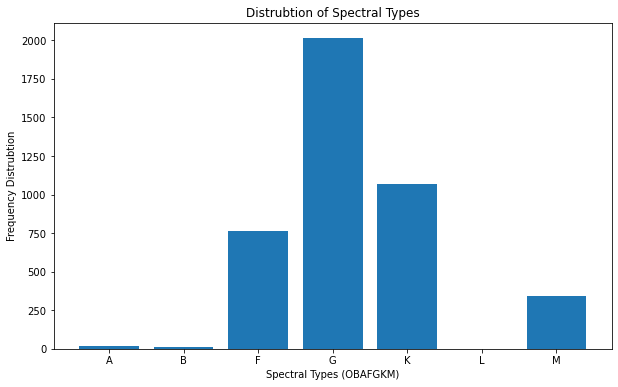

In [159]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(spec_count.keys(), spec_count.values())
plt.title('Distrubtion of Spectral Types')
plt.xlabel('Spectral Types (OBAFGKM)')
plt.ylabel('Frequency Distrubtion')
plt.show()

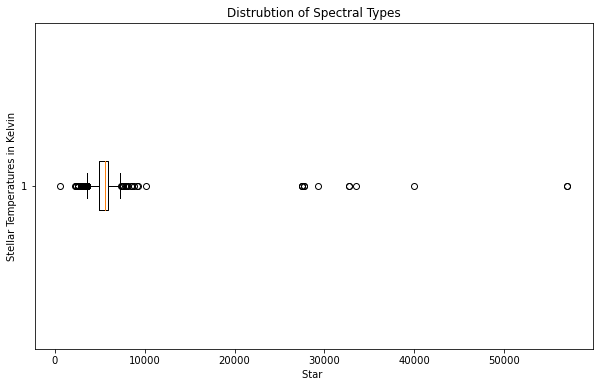

In [187]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.boxplot(HZ.st_teff, vert = False )
plt.title('Distrubtion of Spectral Types')
plt.xlabel('Star ')
plt.ylabel('Stellar Temperatures in Kelvin')
plt.show()